In [7]:
import face_recognition
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt 

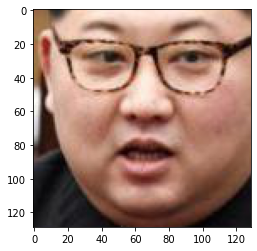

In [18]:
image_of_Fa=face_recognition.load_image_file('C:/Users/user/Downloads/face1.jpg')
Fa_face_encoding=face_recognition.face_encodings(image_of_Fa)[0]
plt.imshow(image_of_Fa)

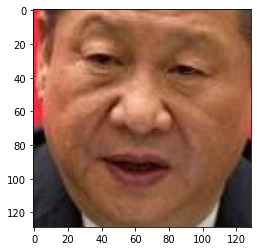

In [19]:
image_of_Esther=face_recognition.load_image_file('C:/Users/user/Downloads/face2.jpg')
Esther_face_encoding=face_recognition.face_encodings(image_of_Esther)[0]
plt.imshow(image_of_Esther)

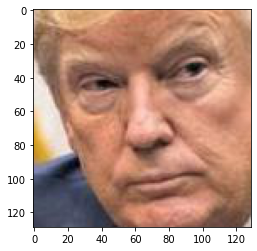

In [20]:
image_of_Winston=face_recognition.load_image_file('C:/Users/user/Downloads/face3.jpg')
Winston_face_encoding=face_recognition.face_encodings(image_of_Winston)[0]
plt.imshow(image_of_Winston)

In [21]:
known_face_encodings=[Fa_face_encoding,Winston_face_encoding]
known_face_names=["Fa","Winston"]

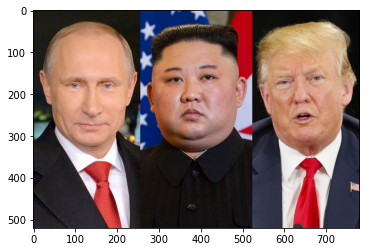

In [22]:
test_image=face_recognition.load_image_file('C:/Users/user/Downloads/leader.jpg')
plt.imshow(test_image)

In [23]:
face_locations=face_recognition.face_locations(test_image)
face_encodings=face_recognition.face_encodings(test_image, face_locations)

In [24]:
pil_image=Image.fromarray(test_image)

draw=ImageDraw.Draw(pil_image)

In [25]:
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches=face_recognition.compare_faces(known_face_encodings, face_encoding)
    name="unknown Person"
    if True in matches:
        first_match_index=matches.index(True)
        name=known_face_names[first_match_index]
    if True in matches:
        second_match_index=matches.index(True)
        name=known_face_names[second_match_index]
    draw.rectangle(((left, top), (right, bottom)), outline=(0,0,0))
    text_width, text_height=draw.textsize(name)
    draw.rectangle(((left, bottom-text_height-8), (right, bottom)), fill=(0,0,255), outline=(0,0,0))
    draw.text((left + 6, bottom-text_height-3), name, fill=(0,255,0))
del draw
pil_image.show()
pil_image.save('C:/Users/user/Downloads/identify.jpg')